# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qa  Load and display the MNIST data

There is a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. You can load MNIST data like 

```python
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',??) # needs to return X, y, replace '??' with suitable parameters! 
# Convert to [0;1] via scaling (not always needed)
#X = X / 255.
```

but you need to set parameters like `return_X_y` and `cache` if the default values are not suitable! 

Check out the documentation for the `fetch_openml` MNIST loader, try it out by loading a (X,y) MNIST data set, and plot a single digit via the `MNIST_PlotDigit` function here (input data is a 28x28 NMIST subimage)

```python
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
```

Finally, put the MNIST loader into a single function called `MNIST_GetDataSet()` so you can reuse it later.

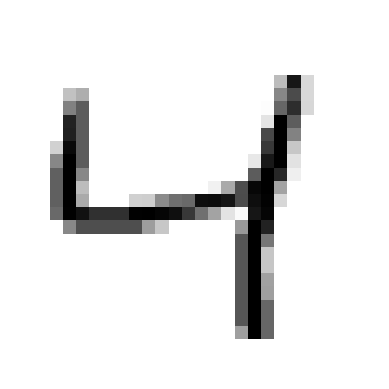

(70000, 784)


In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Function to plot an MNIST digit
def MNIST_PlotDigit(data):
    import matplotlib
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

# Function to load MNIST dataset
def MNIST_GetDataSet():
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, cache=True)
    X = X / 255.0  # Scale pixel values to [0, 1]
    return X, y

# Load the dataset
X, y = MNIST_GetDataSet()

# Plot a single digit. The first one in the dataset
MNIST_PlotDigit(X[2])

print(X.shape)


#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOML], p.103.

Split your data and run the fit-predict for the classifier using the MNIST data.(We will be looking at cross-validation instead of the simple fit-predict in a later exercise.)

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')
```
instead of the `y`'s you are getting out of the dataloader. In effect, we have now created a binary-classifier, that enable us to classify a particular data sample, $\mathbf{x}(i)$ (that is a 28x28 image), as being a-class-5 or not-a-class-5. 

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

X.shape=(70000, 784)
X.shape=(70000, 784)
the ones where we have quessed true
y_pred: False y_test 7
True Negative0
y_pred: False y_test 2
True Negative1
y_pred: False y_test 1
True Negative2
y_pred: False y_test 0
True Negative3
y_pred: False y_test 4
True Negative4
y_pred: False y_test 1
True Negative5
y_pred: False y_test 4
True Negative6
y_pred: False y_test 9
True Negative7
y_pred: False y_test 9
True Negative9
y_pred: True y_test 5
True Positive15
y_pred: True y_test 5
True Positive23
y_pred: True y_test 5
True Positive45


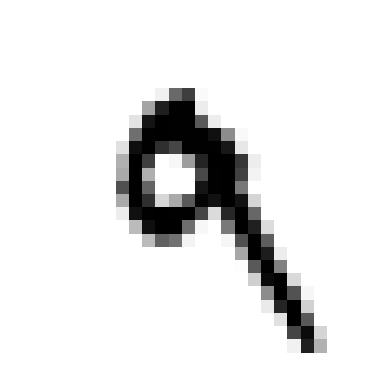

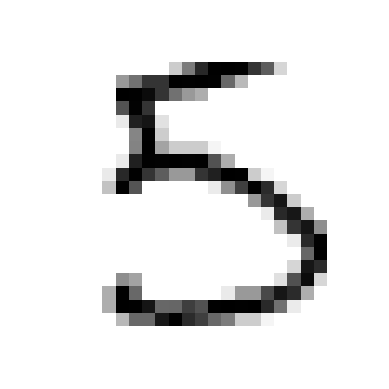

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# load the data
X, y = MNIST_GetDataSet()

# reshape if needed
print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# split data set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# What are we looking fore
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

# Train
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Test
y_pred = sgd_clf.predict(X_test)

# Score
#identify the correct answers
print("the ones where we have quessed true")
for i in range(10):
    if y_pred[i] == False and y_test_5[i] == False:
        print(f"y_pred: {y_pred[i]} y_test {y_test[i]}")
        print(f"True Negative{i}")

for i in range(50):
    if y_pred[i] == True and y_test_5[i] == True:
        print(f"y_pred: {y_pred[i]} y_test {y_test[i]}")
        print(f"True Positive{i}")

MNIST_PlotDigit(X_test[7])
MNIST_PlotDigit(X_test[15])



y_pred: False y_test 5
false negative 8
y_pred: False y_test 5
false negative 153
y_pred: False y_test 5
false negative 211
y_pred: True y_test 3
 false positive245
y_pred: False y_test 5
false negative 340
y_pred: False y_test 5
false negative 352
y_pred: False y_test 5
false negative 406
y_pred: False y_test 5
false negative 460
y_pred: False y_test 5
false negative 469
y_pred: False y_test 5
false negative 478
y_pred: False y_test 5
false negative 502
y_pred: True y_test 3
 false positive569
y_pred: False y_test 5
false negative 645
y_pred: False y_test 5
false negative 674
y_pred: False y_test 5
false negative 720
y_pred: False y_test 5
false negative 751
y_pred: False y_test 5
false negative 791
y_pred: False y_test 5
false negative 857
y_pred: True y_test 3
 false positive938
y_pred: False y_test 5
false negative 955
y_pred: False y_test 5
false negative 970


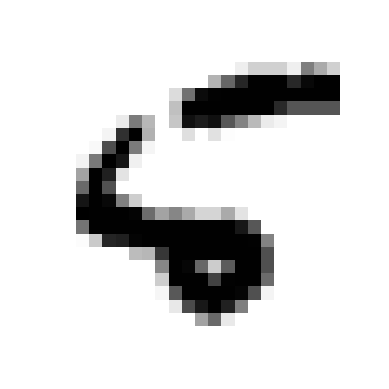

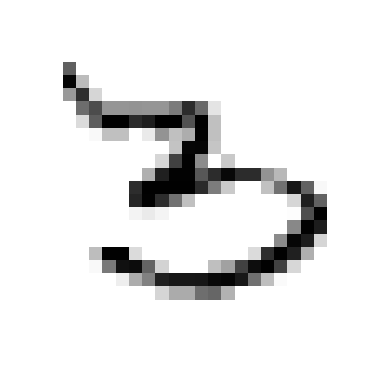

[[9068   40]
 [ 191  701]]


In [74]:
from sklearn.metrics import confusion_matrix

# identify the falses
for i in range(1000):
    if y_pred[i] == False and y_test_5[i] == True:
        print(f"y_pred: {y_pred[i]} y_test {y_test[i]}")
        print(f"false negative {i}")
    
    if y_pred[i] == True and y_test_5[i] == False:
        print(f"y_pred: {y_pred[i]} y_test {y_test[i]}")
        print(f" false positive{i}")

# plotting some the digits it guessed wrong
MNIST_PlotDigit(X_test[8])

MNIST_PlotDigit(X_test[245])

# cross val score from the handbook
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

cm = confusion_matrix(y_test_5, y_pred)
print(cm)

#### Qc Implement a dummy binary classifier

Now we will try to create a Scikit-learn compatible estimator implemented via a python class. Follow the code found on p.107 3rd [HOML] (for [HOML] 1. and 2. editions: name you estimator `DummyClassifier` instead of `Never5Classifyer`).

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/class_base_estimator.png" alt="WARNING: could not get image from server." style="width:500px">

All Scikit-learn classifiers inherit from `BaseEstimator` (and possibly also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duck typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and find a way to extract the accuracy `score` from the test data. You may implement an accuracy function yourself or just use the `sklearn.metrics.accuracy_score` function. 

Finally, compare the accuracy score from your `DummyClassifier` with the scores found in [HOML] "Measuring Accuracy Using Cross-Validation", p.107. Are they comparable? 

(Notice that Scikit-learn now also have a `sklearn.dummy.DummyClassifier`, but you are naturally supposed to create you own...)

In [83]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import numpy as np

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        pass

    def predict(self, X):
        assert X.ndim == 2
        return np.zeros(X.shape[0],dtype=bool)
    

# load the data
X, y = MNIST_GetDataSet()

# reshape if needed
print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# split data set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# What are we looking fore
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

dummy_clf = DummyClassifier()
# Train
dummy_clf.fit(X_train, y_train_5)

# Test
y_pred = dummy_clf.predict(X_test)

# Score
#identify the correct answers
True_Positive = 0
True_Negative = 0
False_Positive = 0
False_Negative = 0

for i in range(10000):
    if y_pred[i] == False and y_test_5[i] == False:
        True_Negative += 1
    if y_pred[i] == True and y_test_5[i] == True:
        True_Positive += 1
    if y_pred[i] == False and y_test_5[i] == True:
        False_Negative += 1
    if y_pred[i] == True and y_test_5[i] == False:
        False_Positive += 1

print(f"True Positive = {True_Positive}")
print(f"True negative = {True_Negative}")
      
print(f"False Positive = {False_Positive}")
print(f"False negative = {False_Negative}")



X.shape=(70000, 784)
X.shape=(70000, 784)
True Positive = 0
True negative = 9108
False Positive = 0
False negative = 892


### Qd Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [36]:
# TODO: Qd concluding remarks in text..

REVISIONS||
:- | :- |
2018-12-19| CEF, initial.
2018-02-06| CEF, updated and spell checked.
2018-02-08| CEF, minor text update.
2018-03-05| CEF, updated with SHN comments.
2019-09-02| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-18| CEF, added binary-classifier text to Qb to emphasise 5/non-5 classification.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-07| CEF, update HOML page numbers.
2024-02-14| CEF, added note on sklearn.dummy.DummyClassifier.
2024-09-13| CEF, updated p.107 and editions text references.